# Lab- Regression
In this lab we will learn how to calcuate regression metrics by hand and compare their result to what we get from sklearn as well. 
This will be a good exercise in helping us understand how regression metrics are calucated.

So the order of things will be: 
1) Build a regression model for randomly generated data <br>
2) Calculate the following metrics by hand- MAE, RMSE, $\text{R}^2$ <br> 
3) Calculate the same set of metrics using sklearn and compare 


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets, metrics


n_points = 100
n_outliers = 10


x, y = datasets.make_regression(n_samples=n_points,
                                      n_features=1,
                                      n_informative=1,
                                      noise=2,
                                      random_state=0)


In [2]:
lr = linear_model.LinearRegression()
lr.fit(x,y)
predictions = lr.predict(x)
slope = lr.coef_
intercept = lr.intercept_

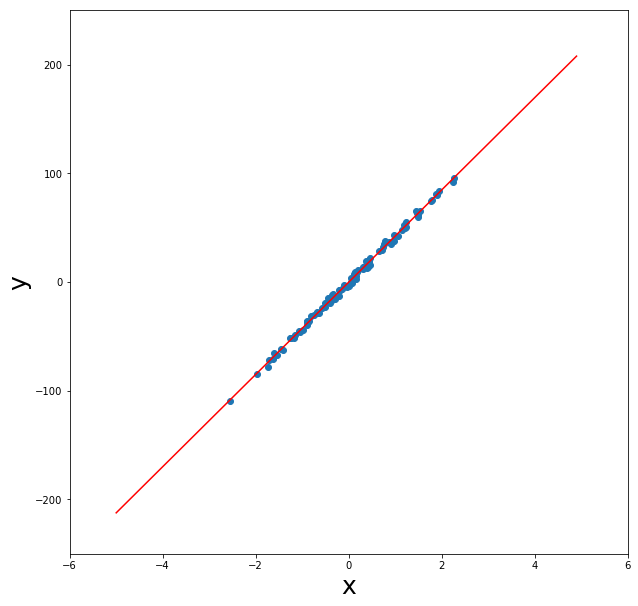

In [24]:
model_x = np.arange(-5,5,0.1 )
model_line = (slope*model_x) + intercept
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.plot(model_x, model_line, c="red")
plt.xlim([-6,6])
plt.ylim([-250, 250])
plt.show()

## Part 1: Manually Calcuating metrics


In [37]:
# MAE: Mean absolute error 

inside_term = np.abs("####")
MAE = "####"
print("MAE value is {:.4f}".format(MAE))

MAE value is 1.7548


MAE value is 1.7548

Note the  "{:.4f}" in the code is there to limit the output to 4 decimal places, we could just as easily have written  "{}" but that would output all the decimal places. The expression "{:.2f}" would mean 2 decimal places, hence MAE would be 1.75. +

In [30]:
# Root Mean squared error 

inside_term =  np.power("####") 
RMSE = np.sqrt("####")
print("MSE value is {:.4f}".format(RMSE))

MSE value is 2.1370


MSE value is 2.1370

In [31]:
# R^2 metric 

denominator = np.sum("####")
numerator = np.sum("####")
R2 = 1 - (numerator/denominator)
print("R2  value is {:.4f}".format(R2))

R2  value is 0.9975


R2  value is 0.9975

# Part 2: Comparing with Sklearn's results


In [33]:
# MSE 
MAE_sk = metrics."####"
print("MAE manual vs MAE using Sklearn- \nMAE manual: {:.4f} \nMAE sklearn: {:.4f}".format(MAE, MAE_sk))

MAE manual vs MAE using Sklearn- 
MAE manual: 1.7548 
MAE sklearn: 1.7548


MAE manual vs MAE using Sklearn- <br>
MAE manual: 1.7548 <br>
MAE sklearn: 1.7548

In [34]:
# RMSE 
RMSE_sk = "####"
print("MSE manual vs MSE using Sklearn- \nMSE manual: {:.4f} \nMSE sklearn: {:.4f}".format(RMSE, RMSE_sk))

MSE manual vs MSE using Sklearn- 
MSE manual: 2.1370 
MSE sklearn: 2.1370


MSE manual vs MSE using Sklearn- <br>
MSE manual: 2.1370 <br>
MSE sklearn: 2.1370

In [35]:
# R2
R2_sk = metrics."####"
print("R2 manual vs R2 using Sklearn- \nR2 manual: {:.4f} \nR2 sklearn: {:.4f}".format(R2, R2_sk))

R2 manual vs R2 using Sklearn- 
R2 manual: 0.9975 
R2 sklearn: 0.9975


R2 manual vs R2 using Sklearn- <br> 
R2 manual: 0.9975  <br>
R2 sklearn: 0.9975

# Part 3: Effect of outliers

In this part we are going to explore how errors affect the value of each metrics. We want to introduce outliers and see what happens to the error values. We will displace the original x and y values and build a new model. We will calculate the errors and compare them. 

In [10]:

displace_index = [10, 50, 15, 20, 30,70,  88]
displacement = [100, -75, 10, -50, -200,150,  50]


displaced_y = y.copy()
displaced_y[displace_index] = y[displace_index] + displacement


In [11]:
lr.fit(x, displaced_y)
displaced_preds = lr.predict(x)
displaced_slope = lr.coef_
displaced_intercept = lr.intercept_


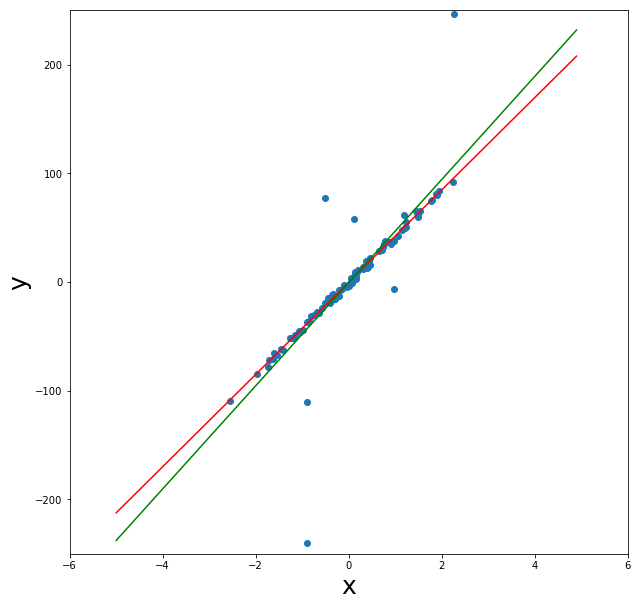

In [28]:
model_x = np.arange(-5,5,0.1 )
model_line = (slope*model_x) + intercept
displaced_model = "####"

plt.figure(figsize=(10,10))
plt.xlabel("x", fontsize=25)
plt.ylabel("y", fontsize=25)
plt.scatter(x,displaced_y)
plt.plot(model_x, model_line, c="red")
plt.plot(model_x, displaced_model, c="green")
plt.xlim([-6,6])
plt.ylim([-250, 250])
plt.show()

The red line is the first model that we trained and the green line is the second model for displaced points. You can see that the outliers do change the parameters i.e slope and the intercept of the model. Hence it becomes important to understand how these outliers affect error measurments we make. 

In [13]:

dis_mae = metrics.mean_absolute_error(displaced_preds, y)

In [14]:
print("New vs old values of MAE are: \nNew MAE: {:.4f} \nOld MAE: {:.4f}".format(dis_mae, MAE))

New vs old values of MAE are: 
New MAE: 4.5313 
Old MAE: 1.7548


In [15]:
dis_rmse = np.sqrt(metrics.mean_squared_error(displaced_preds, y))
print("New vs old values of RMSE are: \nNew RMSE: {:.4f} \nOld RMSE: {:.4f}".format(dis_rmse, RMSE))

New vs old values of RMSE are: 
New RMSE: 5.4616 
Old RMSE: 2.1370


In [16]:
dis_R2 = metrics.r2_score(displaced_preds, y)
print("New vs old values of R2 are: \nNew R2: {:.4f} \nOld R2: {:.4f}".format(dis_R2, R2))

New vs old values of R2 are: 
New R2: 0.9869 
Old R2: 0.9975


Two observations about this excercise: 
1) The $\text{R}^2$ value deoes not change by much due to the outliers. This tells us that $\text{R}^2$ is insensitive to small number of outliers. <br>
2) In both Part 2 and 3 you should observe that the value of $\text{MAE} \leq \text{RMSE}$. As long as we dont change how we calcaute the mean, this will hold <br> 
